In [ ]:
#                                                                                 "Единстванный способ избежать 
#                                                                                         гонки вооружений ИИ - 
#                                                                                это вообще не иметь дела с ИИ."

                                                                                            Megatron-Turing NLG

**Подключаем необходимые библиотеки**

In [ ]:
import tensorflow as tf                                                         # Импорт tensorflow
import numpy as np                                                              # Библиотека работы с массивами
import pandas as pd                                                             # Для работы с таблицами
import os                                                                       # Модули для работы с файлами
import gc                                                                       # Модуль для сборка мусора
from keras.preprocessing import image                                           # Метод обработки изображений библиотеки Keras
from keras.callbacks import EarlyStopping, ModelCheckpoint                      # Импортируем колбэки: Ранняя остановка обучения и Сохранение модели
from tensorflow.keras.models import load_model                                  # Загрузка модели
import shutil                                                                   # Модуль для обработки файлов, групп файлов, и папок
import time                                                                     # Модуль для работы со временем
import seaborn as sns                                                           # Модули для работы с графиками и стилями:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
# Подключение диска
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ufa/train.csv')                        # Загрузим таблицу с данными
fig = px.histogram(df,  x = "class", color = "class")                           # Создаём гистограмму
fig.show()                                                                      # Выводим на экран
df                                                                              # Пример данных

,ID_img,class
0,220301124100_d3815192b7a85e54f935936bbe09496f.jpg,0.0
1,220301124101_c919e95934b3df93a6149764a498b11f.jpg,0.0
2,220301124110_69dcd5eb441c4df666dfedde7ac47fc6.jpg,0.0
3,220301124113_a102c632672df1b5d1e0b7a0fe7360d2.jpg,0.0
4,220301124127_d28e5d63f63b1306b75db49eecbcd3be.jpg,0.0
...,...,...
538,220307085810_d1fadc9772ff8dbe3b1904f752ea17aa.jpg,1.0
539,220307085905_484451476d4469abca1ae1b5c4cddffc.jpg,1.0
540,220307131945_1d2defc24fe3920808beaa3aae29900c.jpg,1.0
541,220307132224_52645281baa22ba7c267cccd4adc58e5.jpg,1.0


Вся база предоставленных для обучения модели фотографий была разделена на три категории:

0. с отсутствующими мусорными баками;

1. соответствующие всем необходимым условиям;

2. неудовлетворительного качества.

После просмотра базы было решено её немного подчистить и сформировать новый отсортированный датасет. Т.к. изначальная база очень разбалансирована, пришлось удалить несколько фотографий 1го класса. Также некоторые фотографии были перенесены в другой класс. В итоге получилось следующее, снизилось переобучение сети и повысился процент правильно распознанных фотографий

**Подготовка датасета и обучение модели**


Found 440 files belonging to 3 classes.
Using 352 files for training.
Found 440 files belonging to 3 classes.
Using 88 files for validation.
258088960/258076736 [==============================] - 1s 0us/step
Epoch 1/50
44/44 [==============================] - ETA: 0s - loss: 0.7484 - accuracy: 0.7216
Epoch 1: val_loss improved from inf to 0.51252, saving model to /content/drive/MyDrive/Ufa/model.h5
44/44 [==============================] - 121s 2s/step - loss: 0.7484 - accuracy: 0.7216 - val_loss: 0.5125 - val_accuracy: 0.9091
Epoch 2/50
44/44 [==============================] - ETA: 0s - loss: 0.3177 - accuracy: 0.9489
Epoch 2: val_loss improved from 0.51252 to 0.25084, saving model to /content/drive/MyDrive/Ufa/model.h5
44/44 [==============================] - 57s 1s/step - loss: 0.3177 - accuracy: 0.9489 - val_loss: 0.2508 - val_accuracy: 0.9205
Epoch 3/50
44/44 [==============================] - ETA: 0s - loss: 0.1237 - accuracy: 0.9830
Epoch 3: val_loss improved from 0.25084 to 0.13

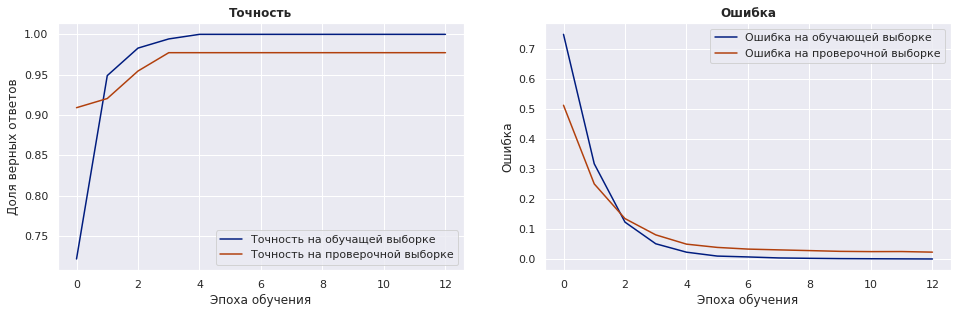

In [ ]:
data_dir = '/content/drive/MyDrive/Ufa/train_sorted'                            # Присваиваем путь к базе в переменную data_dir
batch_size = 8                                                                  # Определяем batch size
image_size = (299, 299)                                                         # Определяем размер изображений

train_ds = tf.keras.preprocessing.image_dataset_from_directory(                 # Формируем обучающий датасет: 
  data_dir,                                                                     # путь к изображениям
  validation_split = 0.2,                                                       # устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "training",                                                          # помечаем, что выборка обучающая (80%)
  seed = 123,                                                                   # дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,                                                      # размер изображений, который был задан ранее
  batch_size = batch_size)                                                      # размер батча, который был задан ранее

val_ds = tf.keras.preprocessing.image_dataset_from_directory(                   # Формируем проверочный датасет:
  data_dir,                                                                     # путь к изображениям
  validation_split = 0.2,                                                       # устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "validation",                                                        # помечаем, что выборка проверочная (20%)
  seed = 123,                                                                   # дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,                                                      # размер изображений, который был задан ранее
  batch_size = batch_size)                                                      # размер батча, который был задан ранее
                                                                                
class_names = train_ds.class_names                                              # Определяем имена классов
                                                                        
AUTOTUNE = tf.data.AUTOTUNE                                                     # Предварительная подгрузка датасета для ускорения обучения и стабилизации
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)                      # Предварительная обучающая выборка
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)                          # Предварительная тестовая выборка

data_augmentation = tf.keras.Sequential([                                       # Аугментация в виде слоя для модели:
  tf.keras.layers.experimental.preprocessing.RandomZoom((-0.05,0.05))])         # произвольное увеличение и уменьшение на 10%

gc.collect()                                                                    # Сборка мусора для освобождения памяти
preprocess_input = tf.keras.applications.efficientnet.preprocess_input          # Нормализация данных на вход в соответствии требованиям модели
image_shape = image_size + (3,)                                                 # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()                 # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))                      # Задаем выходной слой на нужное нам количество классов

base_model = tf.keras.applications.efficientnet.EfficientNetB7(                 # Создаем базовую модель EfficientNet:
    input_shape=image_shape,                                                    # устанавливаем размер входных изображений
    include_top=False,                                                          # не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
    weights='imagenet')                                                         # используем веса уже предобученной модели на базе Imagenet
                                                            
inputs = tf.keras.Input(shape=(image_shape))                                    # Задаём входную размерность
x = data_augmentation(inputs)                                                   # Аугментация в виде слоя для модели
x = preprocess_input(x)                                                         # Нормализация данных на вход
x = base_model(x, training=False)                                               # Базовая модель EfficientNet 
x = global_average_layer(x)                                                     # Cлой GlobalAveragePooling2D
x = tf.keras.layers.Dropout(0.1)(x)                                             # Слой регуляризации Dropout (отключаем 10% нейронов в слое)
outputs = prediction_layer(x)                                                   # Выходной слой на три класса
model = tf.keras.Model(inputs, outputs)                                         # Собирем полную модель

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),             # Компилируем модель: Оптимизатор Adam c заданным шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # метрика Accuracy

early_stop = EarlyStopping(                                                     # Установим раннюю остановку обучения:
                        monitor='val_loss',                                     # отслеживание ошибки на проверочной выборке
                        min_delta=0.01,                                         # минимальное изменение ошибки, которое можно квалифицировать как улучшение
                        patience=4,                                             # количество периодов без улучшения, после которых обучение будет остановлено
                        verbose=1,                                              # визуализация процесса
                        baseline=None,                                          # обучение остановится, если модель не покажет улучшения по сравнению с базовым уровнем
                        restore_best_weights=True)                              # восстановим веса модели из эпохи с лучшим значением отслеживаемой величины

model_сheckpoint = ModelCheckpoint(                                                  # Определим сохранение модели:
                                   filepath='/content/drive/MyDrive/Ufa/model.h5',   # укажем место для сохранения
                                   monitor='val_loss',                               # для контроля общих потерь модели на проверочной выборке
                                   verbose=1,                                        # визуализация процесса
                                   save_best_only=True,                              # сохраняется только тогда, когда модель считается «лучшей»
                                   mode='auto',                                      # авто режим
                                   baseline=None)                                    

callbacks = [early_stop, model_сheckpoint]                                      # Сформируем созданные колбэки

history = model.fit(                                                            # Запускаем обучение:
                   train_ds,                                                    # обучающая выборка
                   epochs=50,                                                   # количество эпох обучения
                   validation_data=val_ds,                                      # проверочная выборка
                   callbacks=callbacks)                                         # колбэки

sns.set(style='darkgrid', palette='dark')                                            # Задаём стиль полотна графика
plt.figure(figsize=(16, 10))                                                         # Устанавливаем размер
plt.subplot(2, 2, 1)                                                                 # Определяем положение 1го графика
plt.title('Точность', fontweight='bold')                                             # Название графика
plt.plot(history.history['accuracy'], label='Точность на обучащей выборке')          # Данные точности на обучающей выборке
plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке')   # Данные точности на проверочной выборке
plt.xlabel('Эпоха обучения')                                                         # Подпись оси Х
plt.ylabel('Доля верных ответов')                                                    # Подпись оси У
plt.legend()                                                                         # Отображение легенды
plt.subplot(2, 2, 2)                                                                 # Определяем положение 2го графика
plt.title('Ошибка', fontweight='bold')                                               # Название графика
plt.plot(history.history['loss'], label='Ошибка на обучающей выборке')               # Данные ошибки на обучающей выборке
plt.plot(history.history['val_loss'], label='Ошибка на проверочной выборке')         # Данные ошибки на проверочной выборке
plt.xlabel('Эпоха обучения')                                                         # Подпись оси Х
plt.ylabel('Ошибка')                                                                 # Подпись оси У
plt.legend()                                                                         # Отображение легенды
plt.show()                                                                           # Выведем график обучения

**Файл для отправки решения**

In [ ]:
Class = []                                                                      # Создаём пустой список
path = '/content/drive/MyDrive/Ufa/test/'                                       # Путь к папке с изображениями
test_list = os.listdir(path)                                                    # Формируем список с именами распознаваемых файлов
ID_img = [x.split('.jpg')[0] for x in test_list]                                # Обрезаем имя файла после расширения
for file in test_list:                                                          # Проходимся циклом по списку
  img = image.load_img(path + (file), target_size=image_size)                   # Загружаем изображение 
  x = image.img_to_array(img)                                                   # Переводим её в массив данных
  x = np.expand_dims(x, axis=0)                                                 # Добавляем одно измерение в начало массива
  x = preprocess_input(x)                                                       # Нормализация данных на вход в соответствии требованиям модели
  pred = model.predict(x)                                                       # Предиктим результат
  cls_image = np.argmax(model.predict(x))                                       # Находим максимальное значение
  Class.append(class_names[cls_image])                                          # Результат заносим в пустой список
data = {'ID_img': ID_img, 'class': Class}                                       # Совмещаем списки имён файлов и результат предсказания 
df = pd.DataFrame(data)                                                         # Создаём DataFrame  
df.to_csv('/content/drive/MyDrive/Ufa/solution.csv', index=False)               # Сохраняем файл
print('Файл сохранён')                                                          # Вывод информации об успешном сохранении файла

Файл сохранён


**Распознавание фотографии**

In [ ]:
model = load_model('/content/drive/MyDrive/Ufa/model.h5')                       # Загрузка модели
preprocess_input = tf.keras.applications.efficientnet.preprocess_input          # Нормализация данных на вход в соответствии требованиям модели
class_names = ['0', '1', '2']                                                   # Определяем классы
image_size = (299, 299)                                                         # Определяем размер изображений
model.summary()                                                                 # Выводим сводку по загруженной модели

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, 10, 10, 2560)     64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 3)                 7683      
                                                             

Категория изображения -  0


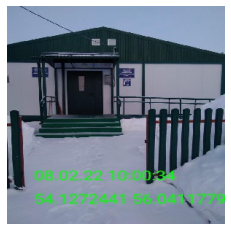

In [ ]:
path = '/content/drive/MyDrive/Ufa/test/783144890_6115399626_44291175108_8.jpg' # Путь к распознаваемому изображению
img = image.load_img(path, target_size=image_size)                              # Загружаем изображение и устанавливаем необходимый размер
plt.axis('off')                                                                 # Отключаем оси
plt.imshow(img)                                                                 # Выводим фотографию на экран
x = image.img_to_array(img)                                                     # Формируем массив данных
x = np.expand_dims(x, axis=0)                                                   # Добавляем одно измерение в начало массива
x = preprocess_input(x)                                                         # Нормализация данных на вход в соответствии требованиям модели
pred = model.predict(x)                                                         # Предиктим результат
cls_image = np.argmax(pred)                                                     # Находим максимальное значение
print('Категория изображения - ', cls_image)                                    # Выводим на экран Категорию изображения

Категория изображения -  2


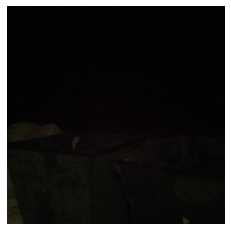

In [ ]:
path = '/content/drive/MyDrive/Ufa/test/1309706375_26859337355_10248277358_6.jpg' # Путь к распознаваемому изображению
img = image.load_img(path, target_size=image_size)                                # Загружаем изображение и устанавливаем необходимый размер
plt.axis('off')                                                                   # Отключаем оси
plt.imshow(img)                                                                   # Выводим фотографию на экран
x = image.img_to_array(img)                                                       # Формируем массив данных
x = np.expand_dims(x, axis=0)                                                     # Добавляем одно измерение в начало массива
x = preprocess_input(x)                                                           # Нормализация данных на вход в соответствии требованиям модели
pred = model.predict(x)                                                           # Предиктим результат
cls_image = np.argmax(pred)                                                       # Находим максимальное значение
print('Категория изображения - ', cls_image)                                      # Выводим на экран Категорию изображения

Категория изображения -  1


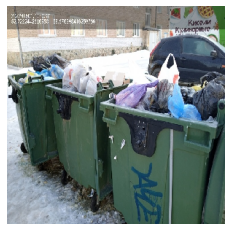

In [ ]:
path = '/content/drive/MyDrive/Ufa/test/11476252728_90946703888_83373466997_4.jpg' # Путь к распознаваемому изображению
img = image.load_img(path, target_size=image_size)                                 # Загружаем изображение и устанавливаем необходимый размер
plt.axis('off')                                                                    # Отключаем отображение осей
plt.imshow(img)                                                                    # Выводим изображение на экран
x = image.img_to_array(img)                                                        # Формируем массив данных
x = np.expand_dims(x, axis=0)                                                      # Добавляем одно измерение в начало массива
x = preprocess_input(x)                                                            # Нормализация данных на вход в соответствии требованиям модели
pred = model.predict(x)                                                            # Предиктим результат
cls_image = np.argmax(pred)                                                        # Находим максимальное значение
print('Категория изображения - ', cls_image)                                       # Выводим на экран Категорию изображения

**Screencast**

In [ ]:
CurrentTime = time.time()                                                       # Засекаем время для измерения времени обработки
path = '/content/drive/MyDrive/Ufa/test/'                                       # Путь к папке с изображениями
test_list = os.listdir(path)                                                    # Формируем список с именами распознаваемых файлов
destination_0 = '/content/drive/MyDrive/Ufa/sorted/Without'                     # Путь к папке с фотографиями без баков
destination_1 = '/content/drive/MyDrive/Ufa/sorted/Ok'                          # Путь к папке с соответствующими фотографиями 
destination_2 = '/content/drive/MyDrive/Ufa/sorted/nOk'                         # Путь к папке с фотографиями плохого качества
for file in test_list:                                                          # Проходимся циклом по списку
  img = image.load_img(path + (file), target_size=image_size)                   # Загружаем изображение 
  x = image.img_to_array(img)                                                   # Переводим её в массив данных
  x = np.expand_dims(x, axis=0)                                                 # Добавляем одно измерение в начало массива
  x = preprocess_input(x)                                                       # Нормализация данных на вход в соответствии требованиям модели
  pred = model.predict(x)                                                       # Предиктим результат
  cls_image = np.argmax(model.predict(x))                                       # Находим максимальное значение
  if cls_image == 0:                                                            # Если распознан класс 0, то
    shutil.move(path + (file), destination_0)                                   # переносим файл в папку с фотографиями без баков
  if cls_image == 1:                                                            # Если распознан класс 1, то
    shutil.move(path + (file), destination_1)                                   # переносим файл в папку с соответствующими фотографиями
  if cls_image == 2:                                                            # Если распознан класс 2, то
    shutil.move(path + (file), destination_2)                                   # переносим файл в папку с плохими фотографиями
print('Фотографии в количестве', len(test_list), 'шт. рассортированы!\n')       # Выводим информацию об успешной обработке, кол-ве и времени
print('Время обработки: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

Фотографии в количестве 225 шт. рассортированы!

Время обработки: 46 секунд (0.77 минут)
